Text(0, 0.5, 'Income($)')

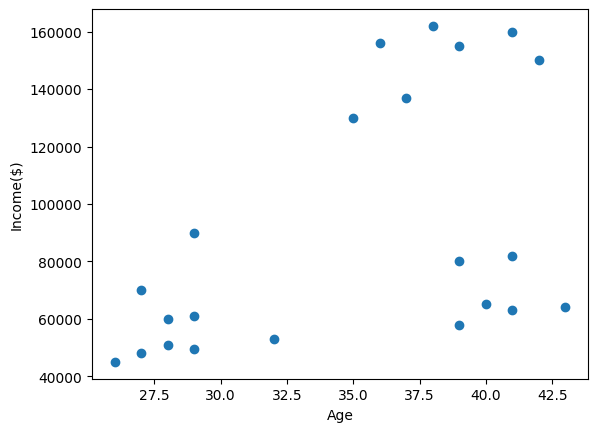

In [10]:
#START WITH K CENTROIDS BY PUTTING THEM AT RANDOM PLACES
#IDENTIFY THE DIST BETWEEN DATAPOINTS AND CENTROID, THE DATAPOINT CLOSER TO THE CENTROID BELONGS
#TO THAT CENTROID'S CLUSTER
#NOW WE TRY TO IMPROVE THE THE CLUSTERS BY ADJUSTING THE CENTROIDS
#REPEAT THE STEP 2 AGAIN AND AGAIN
#LOOP IT TILL NO CHANGE IN DATAPOINTS CLUSTER IS SEEN

#HOW TO DETERMINE THE VALUE OF K??
#--> ALGO METHOD
#START WITH SOME K, AND COMPUTE SUM OF SQUARED ERRORS
# SSE = SSE1 + SSE2 + SSE3 + .....SSEK, AND PLOT THE VALUES
# GENERAL GUIDELINE IS TO FIND THE ELBOW OF THE GRAPH OF SSE V/S K

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('income.csv')
plt.scatter(df.Age , df['Income($)'])
plt.xlabel("Age")
plt.ylabel("Income($)")



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Income($)')

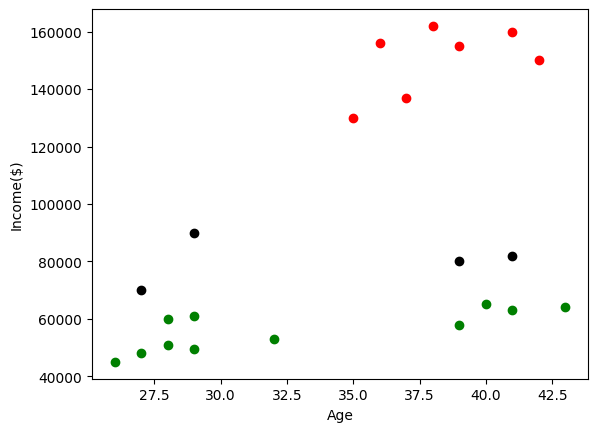

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
df['cluster'] = y_predicted
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age , df1['Income($)'], color='green')
plt.scatter(df2.Age , df2['Income($)'], color='red')
plt.scatter(df3.Age , df3['Income($)'], color='black')
plt.xlabel("Age")
plt.ylabel("Income($)")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


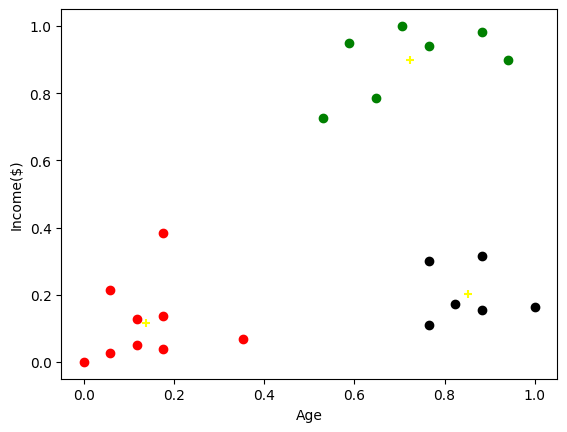

In [26]:
#THERE IS A PROBLEM WITH CLUSTERING BECAUSE SCALING IS NOT CORRECT
#WE NEED TO DO SOME PREPROCESSING
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

km = KMeans(n_clusters=3)
y = km.fit_predict(df[['Age','Income($)']])
df['cluster'] = y
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age , df1['Income($)'], color='green')
plt.scatter(df2.Age , df2['Income($)'], color='red')
plt.scatter(df3.Age , df3['Income($)'], color='black')
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], marker='+',color='yellow')
#to plot centroid km.cluster_centers_ => centroids


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

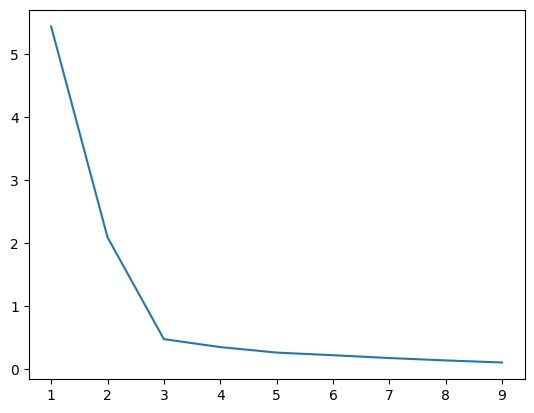

In [32]:
#TO FIND THE ELBOW
sse = []
ka = []
for k in range(1,10):
  ka.append(k)
  km = KMeans(n_clusters=k)
  km.fit_predict(df[['Age','Income($)']])
  sse.append(km.inertia_)  #inertia gives the sum of squares errors
sse
plt.plot(ka,sse)

In [ ]:
#EXERCISE

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

iris = load_iris()
dir(iris)
iris = pd.DataFrame(iris.data , columns = iris.feature_names)

scaler = MinMaxScaler()
scaler.fit(iris[['petal length (cm)']])
iris['petal length (cm)'] = scaler.transform(iris[['petal length (cm)']])
scaler.fit(iris[['petal width (cm)']])
iris['petal width (cm)'] = scaler.transform(iris[['petal width (cm)']])

# plt.scatter(iris['petal length (cm)'],iris['petal width (cm)'])

#now finding the elbow
sse = []
ka = range(1,10)
for k in ka:
  km = KMeans(n_clusters=k)
  km.fit_predict(iris[['petal length (cm)','petal width (cm)']])
  sse.append(km.inertia_)
# plt.plot(ka,sse)

#we get k=3
km = KMeans(n_clusters=3)
y = km.fit_predict(iris[['petal length (cm)','petal width (cm)']])
iris['cluster'] = y

iris1 = iris[iris.cluster==0]
iris2 = iris[iris.cluster==1]
iris3 = iris[iris.cluster==2]
plt.scatter(iris1['petal length (cm)'],iris1['petal width (cm)'],color='red')
plt.scatter(iris2['petal length (cm)'],iris2['petal width (cm)'],color='yellow')
plt.scatter(iris3['petal length (cm)'],iris3['petal width (cm)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='+',color='green')
# km.cluster_centers_